## - Exercici 1
#### Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

importem el modul chardet per poder visualitzar el dataframe i indiquem que els separadors són ; i no ,. 

In [3]:
import chardet

with open('LliguesEuropeesUEFA.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
uefa = pd.read_csv('LliguesEuropeesUEFA.csv', encoding=result['encoding'], sep=';')

Mostrem els primers registres

In [5]:
uefa.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


Les columnes del conjunt de dades són:

- Rk: Rànquing de l'equip
- Squad: Nom de l'equip
- Country: País de l'equip
- LgRk: Rànquing de l'equip a la seva lliga nacional
- MP: Partits jugats
- W: Partits guanyats
- D: Partits empatats
- L: Partits perduts
- GF: Gols a favor
- GA: Gols en contra
- GD: Diferència de gols (GF - GA)
- Pts: Punts obtinguts a la lliga
- Pts/G: Mitjana de punts obtinguts per partit jugat
- xG: Expected Goals (gols esperats) de l'equip a la temporada, segons un model estadístic
- xGA: Expected Goals en contra de l'equip a la temporada, segons un model estadístic
- xGD: Expected Goals Difference (diferència de gols esperats) de l'equip a la temporada, segons un model estadístic
- xGD/90: Expected Goals Difference per partit jugat
- Last 5: Últims 5 partits jugats (en ordre cronològic)
- Attendance: mitjana d'assistència a l'estadi durant la temporada
- Top Team Scorer: Màxim golejador de l'equip a la temporada
- Goalkeeper: Porter titular de l'equip a la temporada

Explorem el tipus de dades que conté la taula i veiem que la majoria són integers, floats i que hi ha 5 objectes, fet que vol dir que deuen ser variables categòriques.

In [6]:
uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [7]:
uefa['GF'].head(10)

0    96
1    89
2    80
3    97
4    85
5    66
6    81
7    71
8    85
9    68
Name: GF, dtype: int64

#### Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

Hipòtesi nula (H0): El promig de gols a favor a la lliga és igual a 50.
Hipòtesi alternativa (Ha): El promig de gols a favor a la lliga no és igual a 50.


In [8]:
from scipy.stats import ttest_1samp

In [9]:
gf_mean = uefa['GF'].mean()
print(f"Promig de gols a favor: {gf_mean}")

Promig de gols a favor: 50.87755102040816


A continuación, realizarem el t-test y calcularem el p-valor:

In [31]:
t_stat, p_val = ttest_1samp(uefa['GF'], 50)

print(f"Estadistica t: {t_stat}")
print(f"p-valor: {p_val}")

Estadistica t: 0.5394863210636687
p-valor: 0.5907875811044541


Com que el p-valor és major que el nivell de significància, no podem rebutjar la hipòtesi nula i concluim que no hi ha suficient evidència estadística per afirmar que el promig de gols a favor a la lliga no és igual a 50.

A la seguent gràfica de distribució podem veure la mitja (línia vermella) i la hipòtesi nula (línia verda) molt a prop. 

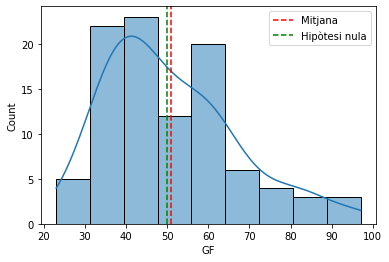

In [61]:
sns.histplot(uefa['GF'], kde=True)
plt.axvline(uefa['GF'].mean(), color='red', linestyle='--', label='Mitjana')
plt.axvline(50, color='green', linestyle='--', label='Hipòtesi nula')
plt.legend()
plt.show()

## - Exercici 2
#### Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Seleccionem els atributs "xG" (Expected Goals) i "Pts" (Punts) del conjunt de dades.

Hipòtesi nul·la (H0): La correlació entre xG i Pts és igual a zero.

Hipòtesi alternativa (Ha): La correlació entre xG i Pts no és igual a zero.

Per provar aquesta hipòtesi, podem fer una prova de correlació i calcular el valor p. Utilitzant un nivell de significància de 0,05, si el valor p és menor que 0,05, rebutgem la hipòtesi nul·la i concloem que hi ha evidència suficient per afirmar que hi ha una correlació entre xG i Pts.

El codi per fer aquesta prova seria el següent:


In [48]:
xG = uefa['xG']
Pts = uefa['Pts']
stat, p = pearsonr(xG, Pts)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablement independent')
else:
 print('Probablement dependent')

stat=0.848, p=0.000
Probablement dependent


Hem de rebutjar la hipotesis nula perquè el p value és igual a 0. Hi ha correlació entre les dues variables. A continuació grafiquem la correlació i veiem que és força important.

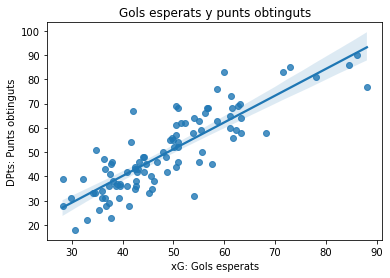

In [10]:
sns.regplot(x=uefa.xG, y=uefa.Pts)
plt.title('Gols esperats y punts obtinguts')
plt.xlabel('xG: Gols esperats')
plt.ylabel('DPts: Punts obtinguts')
plt.show()

## - Exercici 3
#### Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Compararem si les variables W(partits guanyats), D(partits empatats), L(partits perduts) tenen una mateixa distribució. 

Hipòtesi nul·la (H0): les distribucions de les variables són iguals

Hipòtesi alternativa (Ha): les distribucions de les variables no són iguals

In [65]:
from scipy.stats import f_oneway
data1 = uefa['W']
data2 = uefa['D']
data3 = uefa['L']
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablement la mateixa distribució')
else:
 print('Probabablement distribucions diferents')

stat=23.632, p=0.000
Probabablement distribucions diferents


Rebutgem per tant la hipòtesis nula i observem en el gràfic de kdeplot com les distribucions són efectivament diferents

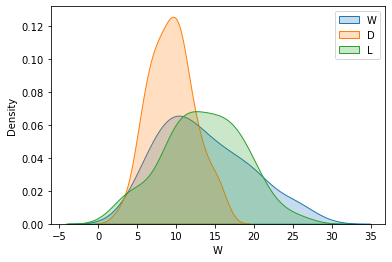

In [58]:
sns.kdeplot(data1, shade=True, label='W')
sns.kdeplot(data2, shade=True, label='D')
sns.kdeplot(data3, shade=True, label='L')
plt.legend()
plt.show()